In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
import warnings
warnings.simplefilter('ignore', (FutureWarning, DeprecationWarning))

In [3]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [6]:
print(X[:30])

[[7.7 3.8 6.7 2.2]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.3]
 [5.4 3.7 1.5 0.2]
 [4.9 2.5 4.5 1.7]
 [5.5 2.3 4.  1.3]
 [6.4 2.7 5.3 1.9]
 [6.9 3.1 4.9 1.5]
 [5.1 3.4 1.5 0.2]
 [5.1 3.8 1.9 0.4]
 [7.1 3.  5.9 2.1]
 [5.  2.  3.5 1. ]
 [5.1 3.7 1.5 0.4]
 [5.8 2.6 4.  1.2]
 [6.  2.2 4.  1. ]
 [4.8 3.4 1.6 0.2]
 [6.2 3.4 5.4 2.3]
 [5.2 3.5 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [4.9 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [6.7 2.5 5.8 1.8]
 [6.4 2.8 5.6 2.1]
 [5.1 3.5 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.5 3.  5.8 2.2]
 [6.1 3.  4.9 1.8]
 [4.9 3.  1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [6.1 2.9 4.7 1.4]]


In [7]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[nan, 3. , 4.4, 1.4],
       [nan, 2.4, 3.7, 1. ],
       [nan, 2.9, 5.6, 1.8],
       [nan, 3. , 4.5, 1.5],
       [nan, 2.7, 4.9, 1.8],
       [nan, 2.9, 4.3, 1.3],
       [nan, 3.4, 1.6, 0.4],
       [nan, 2.8, 5.1, 2.4],
       [nan, 3.6, 1. , 0.2],
       [nan, 2.8, 4.7, 1.2],
       [7.7, 2.8, 6.7, 2. ],
       [nan, 3. , 4.2, 1.2],
       [nan, 2.7, 3.9, 1.2],
       [nan, 2.6, 4.4, 1.2],
       [nan, 2.5, 4.9, 1.5],
       [nan, 3. , 5.2, 2.3],
       [nan, 3.8, 6.4, 2. ],
       [nan, 3.7, 1.5, 0.2],
       [nan, 2.2, 5. , 1.5],
       [nan, 2.8, 4.6, 1.5],
       [nan, 3.5, 1.3, 0.3],
       [nan, 3.2, 5.9, 2.3],
       [nan, 2.8, 6.1, 1.9],
       [nan, 3.4, 1.4, 0.3],
       [nan, 3.4, 1.5, 0.2],
       [nan, 3. , 1.4, 0.1],
       [nan, 3.9, 1.7, 0.4],
       [nan, 3.2, 4.5, 1.5],
       [nan, 3.3, 1.7, 0.5],
       [nan, 2.8, 4.8, 1.8]])

In [8]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[7.7, 3.8, 6.7, 2.2],
       [nan, nan, 4.2, 1.3],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [nan, nan, nan, nan],
       [6.4, 2.7, 5.3, 1.9],
       [6.9, 3.1, 4.9, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [5. , 2. , 3.5, 1. ],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [nan, nan, nan, nan],
       [4.8, 3.4, 1.6, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [5.1, nan, nan, nan],
       [6.7, 3.1, 4.4, 1.4],
       [6.5, 3. , 5.8, 2.2],
       [nan, nan, nan, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.1, 2.9, 4.7, 1.4]])

In [9]:
X[y==2].mean(axis=0)

array([6.588, 2.974, 5.552, 2.026])

In [10]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[7.7, 3.8, 6.7, nan],
       [5.7, 2.9, 4.2, 1.3],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.3, 4. , 1.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.9, 3.1, nan, nan],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [7.1, 3. , 5.9, nan],
       [5. , 2. , 3.5, 1. ],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [6.7, 2.5, nan, nan],
       [6.4, 2.8, nan, nan],
       [5.1, 3.5, 1.4, 0.2],
       [6.7, 3.1, nan, 1.4],
       [6.5, 3. , nan, 2.2],
       [6.1, 3. , nan, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.1, 2.9, 4.7, 1.4]])

In [11]:
np.mean(mask)

0.25333333333333335

In [12]:
np.bincount(y[~mask2])

array([50, 38, 23])

In [13]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)

0.793939393939394

In [16]:
print(X_train[-30:])

[[6.7 3.1 nan 1.4]
 [7.7 2.8 6.7 2. ]
 [5.7 4.4 1.5 0.4]
 [5.1 3.3 1.7 0.5]
 [4.6 3.4 1.4 0.3]
 [4.8 3.4 1.6 0.2]
 [5.2 4.1 1.5 0.1]
 [5.7 3.  4.2 1.2]
 [7.7 3.  6.1 2.3]
 [7.4 2.8 6.1 nan]
 [7.2 3.6 nan nan]
 [5.1 3.8 1.6 0.2]
 [5.6 2.8 nan 2. ]
 [5.1 3.4 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [4.6 3.6 1.  0.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.1 3.  nan 1.4]
 [6.7 3.  nan nan]
 [4.6 3.1 1.5 0.2]
 [7.9 3.8 6.4 nan]
 [6.5 3.  nan 1.8]
 [4.8 3.  1.4 0.1]
 [5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 nan]
 [5.2 3.4 1.4 0.2]
 [5.7 2.5 nan nan]
 [6.3 2.7 nan nan]
 [6.4 3.2 nan nan]]


In [17]:
np.set_printoptions(precision=3)

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median").fit(X_train)
X_median_imp = imp.transform(X_train)
X_median_imp[-30:]

array([[6.7, 3.1, 3.5, 1.4],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3. , 6.1, 2.3],
       [7.4, 2.8, 6.1, 1.1],
       [7.2, 3.6, 3.5, 1.1],
       [5.1, 3.8, 1.6, 0.2],
       [5.6, 2.8, 3.5, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 3. , 3.5, 1.4],
       [6.7, 3. , 3.5, 1.1],
       [4.6, 3.1, 1.5, 0.2],
       [7.9, 3.8, 6.4, 1.1],
       [6.5, 3. , 3.5, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [5.1, 2.5, 3. , 1.1],
       [6.2, 2.2, 4.5, 1.1],
       [5.2, 3.4, 1.4, 0.2],
       [5.7, 2.5, 3.5, 1.1],
       [6.3, 2.7, 3.5, 1.1],
       [6.4, 3.2, 3.5, 1.1]])

In [19]:
X_median_imp.shape

(112, 4)

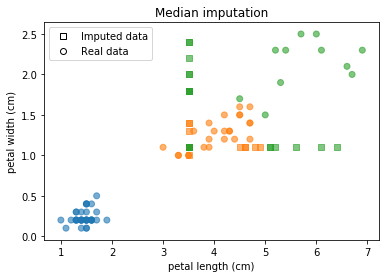

In [20]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.tab10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.tab10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])

    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_median_imp, "Median imputation")
plt.savefig("images/median_imputation.png")

In [21]:
# I designed the problem so that mean imputation wouldn't work

In [22]:
median_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression())
scores = cross_val_score(median_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.7772727272727271

# Model-driven imputation and KNN

In [23]:
from sklearn.impute import KNNImputer

In [24]:
knnimp = KNNImputer().fit(X_train)
X_train_knn = knnimp.transform(X_train)

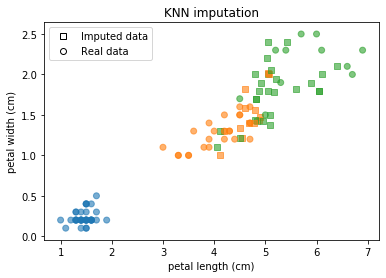

In [25]:
plot_imputation(X_train_knn, "KNN imputation")
plt.savefig("images/knn_imputation.png")

In [26]:
knn_pipe = make_pipeline(KNNImputer(), StandardScaler(), LogisticRegression())

scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.8825757575757575

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

rfimp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100))
rfimp.fit(X_train)
X_rf_imp = rfimp.transform(X_train)


/home/andy/checkout/scikit-learn/sklearn/impute/_iterative.py:608: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


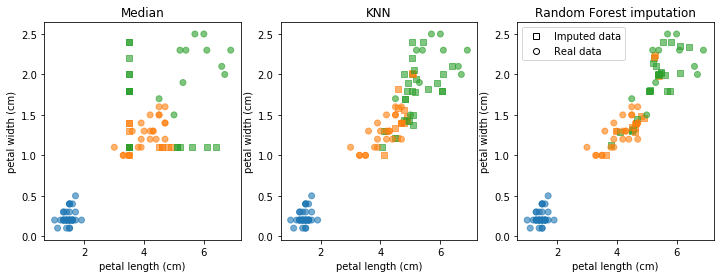

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_imputation(X_median_imp, "Median", ax=axes[0])
plot_imputation(X_train_knn, "KNN", ax=axes[1])
plot_imputation(X_rf_imp, "Random Forest imputation", ax=axes[2])
plt.savefig("images/med_knn_rf_comparison.png")

In [36]:
rf_imp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100))
rf_pipe = make_pipeline(rf_imp, StandardScaler(), LogisticRegression())

scores = cross_val_score(rf_pipe, X_rf_imp, y_train, cv=10)
np.mean(scores)

0.8924242424242423